In [114]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [115]:
# Load the dataset
data = pd.read_csv(r'C:\Users\user\Downloads\test.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [116]:
# Display descriptive statistics of the dataset
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [117]:
def calculate_and_combine_statistics(data):
    """
    Calculates median, variance, standard deviation, skewness, and kurtosis for numeric columns in the DataFrame.

    Parameters:
    - data: DataFrame containing the data for which the statistics will be calculated.

    Returns:
    - A DataFrame with the calculated statistics.
    """
    medians = data.median(numeric_only=True).rename('Median')
    variance = data.var(numeric_only=True).rename('Variance')
    standard_deviation = data.std(numeric_only=True).rename('Std Deviation')
    skewness = data.skew(numeric_only=True).rename('Skewness')
    kurtosis = data.kurtosis(numeric_only=True).rename('Kurtosis')

    # Combining the statistics into a single DataFrame
    combined_stats = pd.concat([medians, variance, standard_deviation, skewness, kurtosis], axis=1)

    return combined_stats

# Calculate the statistics
stats_table = calculate_and_combine_statistics(data)

# Print the well-formatted table
print(stats_table.to_string(float_format='%.2f'))

                                    Median      Variance  Std Deviation  Skewness  Kurtosis
Unnamed: 0                        12987.50   56231546.00        7498.77      0.00     -1.20
id                                65319.50 1414626936.69       37611.53     -0.01     -1.21
Age                                  40.00        229.09          15.14     -0.00     -0.72
Flight Distance                     849.00     997369.73         998.68      1.10      0.25
Inflight wifi service                 3.00          1.78           1.34      0.04     -0.86
Departure/Arrival time convenient     3.00          2.35           1.53     -0.32     -1.05
Ease of Online booking                3.00          2.00           1.41     -0.02     -0.93
Gate location                         3.00          1.64           1.28     -0.06     -1.04
Food and drink                        3.00          1.77           1.33     -0.17     -1.14
Online boarding                       4.00          1.84           1.36     -0.4

In [121]:
def plot_correlation_matrix(data):
    """
    Calculates the correlation matrix for numeric features in the dataset and displays this matrix as a table.
    
    Automatically excludes non-numeric columns from the correlation calculation.
    
    Parameters:
    - data: DataFrame containing the dataset with numeric and possibly non-numeric features.
    
    Returns:
    None
    """
    # Calculating the correlation matrix, excluding non-numeric columns
    numeric_data = data.select_dtypes(include=[float, int])  # Select only numeric columns
    correlation_matrix = numeric_data.corr()
    
    # Convert the correlation matrix to a DataFrame
    correlation_table = correlation_matrix.style.format("{:.2f}")
    
    # Displaying the correlation table
    display(correlation_table)

In [122]:
# Plotting correlation analysis
plot_correlation_matrix(data)

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.00,0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.01,-0.01,0.00,-0.00,0.00,0.00,-0.01,-0.01,-0.01,-0.00
id,0.01,1.00,0.01,0.10,-0.03,-0.00,0.01,0.00,-0.01,0.06,0.05,-0.00,0.06,0.04,0.07,0.08,0.08,0.02,-0.01,-0.03
Age,-0.01,0.01,1.00,0.10,0.01,0.03,0.01,0.00,0.02,0.20,0.15,0.07,0.05,0.03,-0.05,0.03,-0.06,0.05,-0.00,-0.01
Flight Distance,-0.00,0.10,0.10,1.00,0.01,-0.01,0.06,0.01,0.06,0.21,0.16,0.14,0.12,0.14,0.07,0.08,0.07,0.11,0.00,0.00
Inflight wifi service,-0.00,-0.03,0.01,0.01,1.00,0.35,0.71,0.35,0.12,0.46,0.12,0.20,0.11,0.16,0.12,0.05,0.11,0.13,-0.01,-0.01
Departure/Arrival time convenient,-0.00,-0.00,0.03,-0.01,0.35,1.00,0.44,0.46,-0.02,0.08,-0.00,-0.02,0.06,0.00,0.07,0.08,0.07,-0.01,-0.00,-0.00
Ease of Online booking,-0.00,0.01,0.01,0.06,0.71,0.44,1.00,0.47,0.03,0.41,0.02,0.04,0.04,0.12,0.04,-0.00,0.04,0.01,-0.00,-0.00
Gate location,-0.00,0.00,0.00,0.01,0.35,0.46,0.47,1.00,-0.01,0.01,-0.00,-0.00,-0.03,-0.00,-0.00,-0.05,-0.01,-0.01,0.01,0.01
Food and drink,-0.01,-0.01,0.02,0.06,0.12,-0.02,0.03,-0.01,1.00,0.23,0.58,0.63,0.05,0.04,0.04,0.08,0.04,0.66,-0.03,-0.03
Online boarding,-0.00,0.06,0.20,0.21,0.46,0.08,0.41,0.01,0.23,1.00,0.42,0.28,0.15,0.12,0.08,0.20,0.07,0.32,-0.02,-0.03


In [52]:
def plot_satisfaction_by_class(data):
    """
    Plots a stacked bar chart showing passenger satisfaction by travel class.
    
    Parameters:
    data (DataFrame): The dataset containing passenger information.
    """
    # Handling missing values
    data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)
    
    # Mapping 'Class' and 'satisfaction' to ensure consistency
    data['Class'] = data['Class'].map({'Eco': 'Eco', 'Eco Plus': 'Eco Plus', 'Business': 'Business'})
    data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied': 'Neutral or Dissatisfied', 'satisfied': 'Satisfied'})
    
    # Check if there are still non-numeric values after mapping
    non_numeric_values = data[~data['Class'].isin(['Eco', 'Eco Plus', 'Business']) | ~data['satisfaction'].isin(['Neutral or Dissatisfied', 'Satisfied'])]
    if not non_numeric_values.empty:
        print("Non-numeric values found after mapping:", non_numeric_values)
        return
    
    # Grouping and counting data by 'Class' and 'satisfaction'
    class_satisfaction_counts = data.groupby(['Class', 'satisfaction']).size().unstack(fill_value=0)
    
    # Ensure the grouped data is numeric for plotting
    class_satisfaction_counts = class_satisfaction_counts.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric values to NaN
    
    # Drop any rows with NaN values (if any)
    class_satisfaction_counts = class_satisfaction_counts.dropna()
    
    if class_satisfaction_counts.empty:
        print("No numeric data to plot after cleaning.")
        return
    
    # Plotting
    plt.figure(figsize=(10, 6), dpi=144)
    class_satisfaction_counts.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title('Passenger Satisfaction by Travel Class')
    plt.xlabel('Travel Class')
    plt.ylabel('Number of Passengers')
    plt.xticks(rotation=45)
    plt.legend(title='Satisfaction')
    plt.tight_layout()
    plt.show()


<Figure size 1440x864 with 0 Axes>

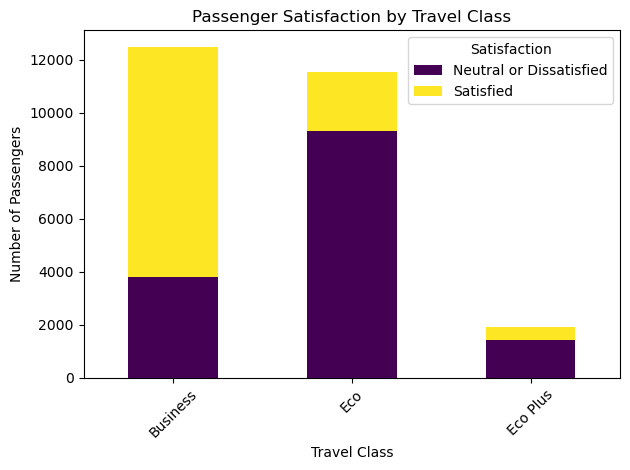

In [53]:
plot_satisfaction_by_class(data)

In [54]:
def plot_departure_arrival_delays():
    """
    Plots the relationship between departure and arrival delays using a scatter plot.
    
    Parameters:
    None
    
    Returns:
    None
    """
    plt.figure(figsize=(10, 6), dpi=144)
    sns.scatterplot(data=data, x='Departure Delay in Minutes', y='Arrival Delay in Minutes',
                    alpha=0.6, marker='o', color='royalblue')

    plt.title('Relationship between Departure and Arrival Delays')
    plt.xlabel('Departure Delay (in minutes)')
    plt.ylabel('Arrival Delay (in minutes)')
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.tight_layout()

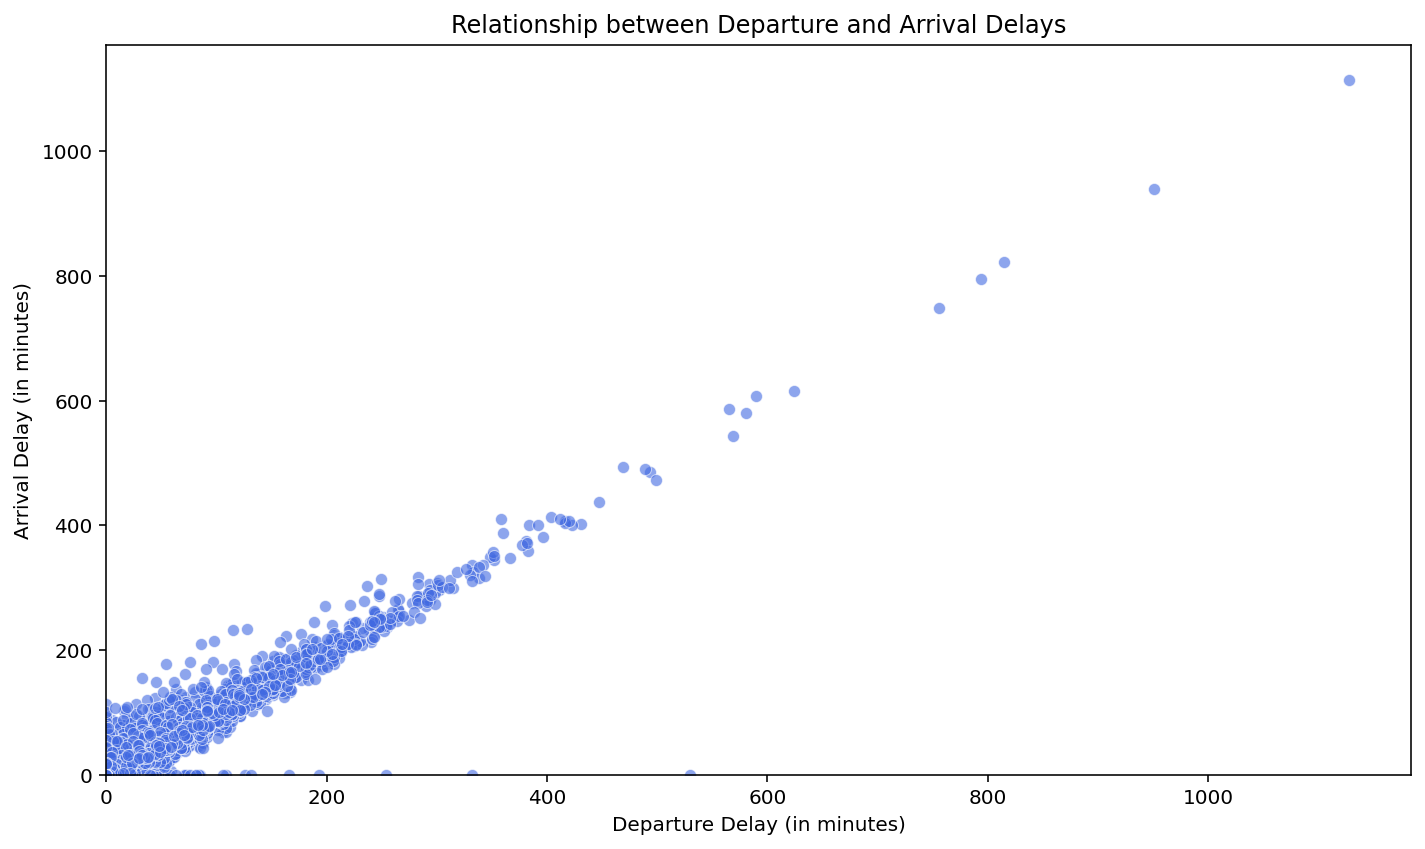

In [55]:
plot_departure_arrival_delays()

In [56]:
def plot_correlation_matrix_services(data):
    """
    Calculates the correlation matrix for selected airline service features,
    and plots a heatmap to visualize these correlations.

    Parameters:
    - data: DataFrame containing the airline survey data.

    Returns:
    None
    """
    # Selecting relevant columns for the heatmap
    service_features = ['Inflight wifi service', 'Seat comfort', 'Cleanliness', 
                        'Food and drink', 'Online boarding', 'Inflight entertainment', 
                        'On-board service', 'Leg room service', 'Baggage handling', 
                        'Checkin service', 'Inflight service']

    # Calculating the correlation matrix for these features
    correlation_matrix_services = data[service_features].corr()

    plt.figure(figsize=(12, 8), dpi=144)
    sns.heatmap(correlation_matrix_services, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix for Airline Service Features')
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Display the heatmap
    plt.show()

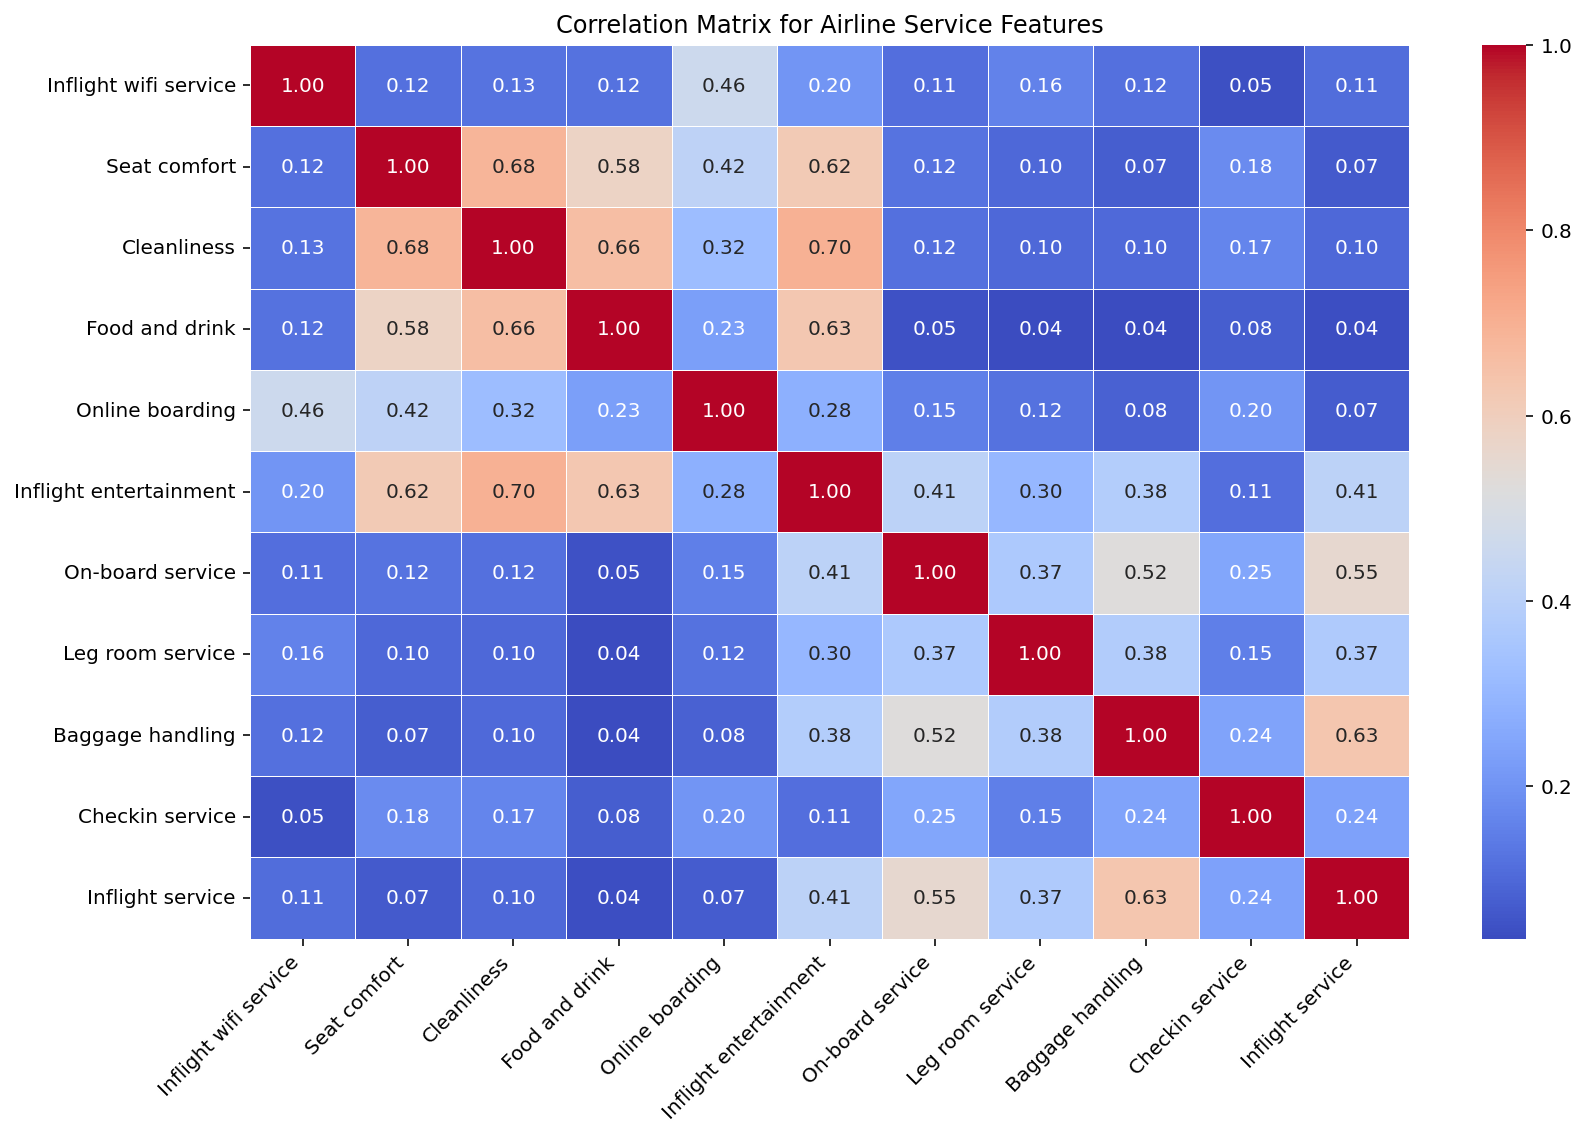

In [57]:
plot_correlation_matrix_services(data)

In [58]:
def perform_clustering_and_silhouette_analysis(data):
    """
    Perform KMeans clustering and silhouette analysis on airlplane passenger satisfaction.

    Parameters:
    - data: DataFrame containing the dataset.

    Returns:
    None
    """
    # Numerical features to be included in the analysis
    numerical_features = ['Age', 'Flight Distance', 
                          'Inflight wifi service', 'Departure/Arrival time convenient', 
                          'Ease of Online booking', 'Gate location', 'Food and drink', 
                          'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                          'On-board service', 'Leg room service', 'Baggage handling', 
                          'Checkin service', 'Inflight service', 'Cleanliness', 
                          'Departure Delay in Minutes', 'Arrival Delay in Minutes']

    # Pipeline for numerical features
    numerical_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),  # Fill missing values
        ('scaler', StandardScaler())  # Scale data
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_pipeline, numerical_features)
        ])

    # Apply transformations
    data_prepared = preprocessor.fit_transform(data)
    
    silhouette_scores = []
    k_values = range(2, 11)  # Testing a range of k values from 2 to 10

    for k in k_values:
        # Setting n_init explicitly to suppress the future warning
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(data_prepared)
        silhouette_avg = silhouette_score(data_prepared, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot the silhouette scores
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, silhouette_scores, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette Analysis For Optimal k')
    plt.show()

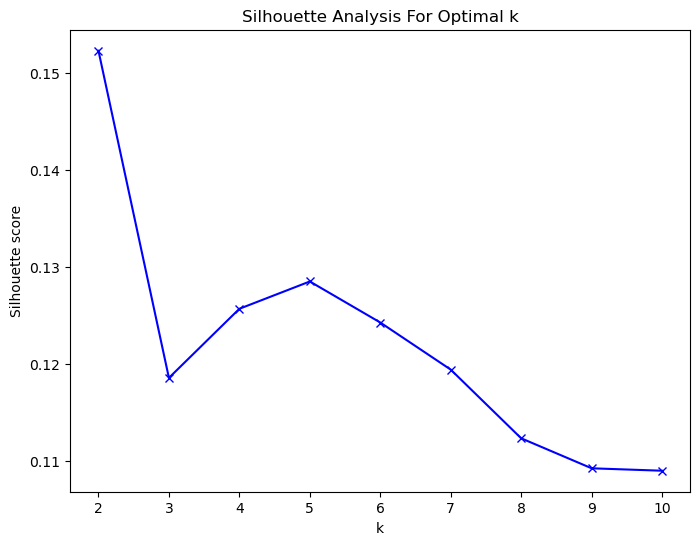

In [44]:
perform_clustering_and_silhouette_analysis(data)

In [110]:
def plot_cluster_scatter(data_prepared, k_optimal):
    """
    Visualizes clusters using a scatter plot with PCA for dimensionality reduction,
    including new predicted points and labeled cluster centers.

    Parameters:
    - data_prepared: Preprocessed data with numerical features.
    - k_optimal: Number of clusters determined to be optimal.

    Returns:
    None
    """
    # Normalize or scale the data to present
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_prepared)

    # Fit the KMeans model
    kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
    kmeans.fit(data_scaled)

    # Apply PCA to reduce dimensions for visualization
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data_scaled)

    # Generate synthetic new data points (replace with actual new data in practice)
    np.random.seed(42)  # For reproducibility
    new_points = np.random.uniform(-3, 3, (10, data_scaled.shape[1]))  # Generating 10 new points
    new_points_scaled = scaler.transform(new_points)  # Transform new points with the same scaler used for data

    # Predict cluster memberships for new points
    new_points_labels = kmeans.predict(new_points_scaled)

    # Visualization with specified DPI, colored groups, and labeled cluster centers
    plt.figure(figsize=(10, 8), dpi=144)
    colors = plt.cm.rainbow(np.linspace(0, 1, k_optimal))

    # Plot each original cluster
    for i, color in zip(range(k_optimal), colors):
        plt.scatter(principal_components[kmeans.labels_ == i, 0], 
                    principal_components[kmeans.labels_ == i, 1], 
                    color=color, alpha=0.5, label=f'Cluster {i}')

    # Plot new predicted points with distinct markers
    for i, color in zip(range(k_optimal), colors):
        plt.scatter(new_points_scaled[new_points_labels == i, 0], 
                    new_points_scaled[new_points_labels == i, 1], 
                    s=100, color=color, edgecolor='black', marker='s', label=f'New Point in Cluster {i}')

    centers = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers[:, 0], centers[:, 1], s=250, marker='*', c='black', label='Centers')

    plt.title('Cluster Visualization with PCA Including Predicted Points')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

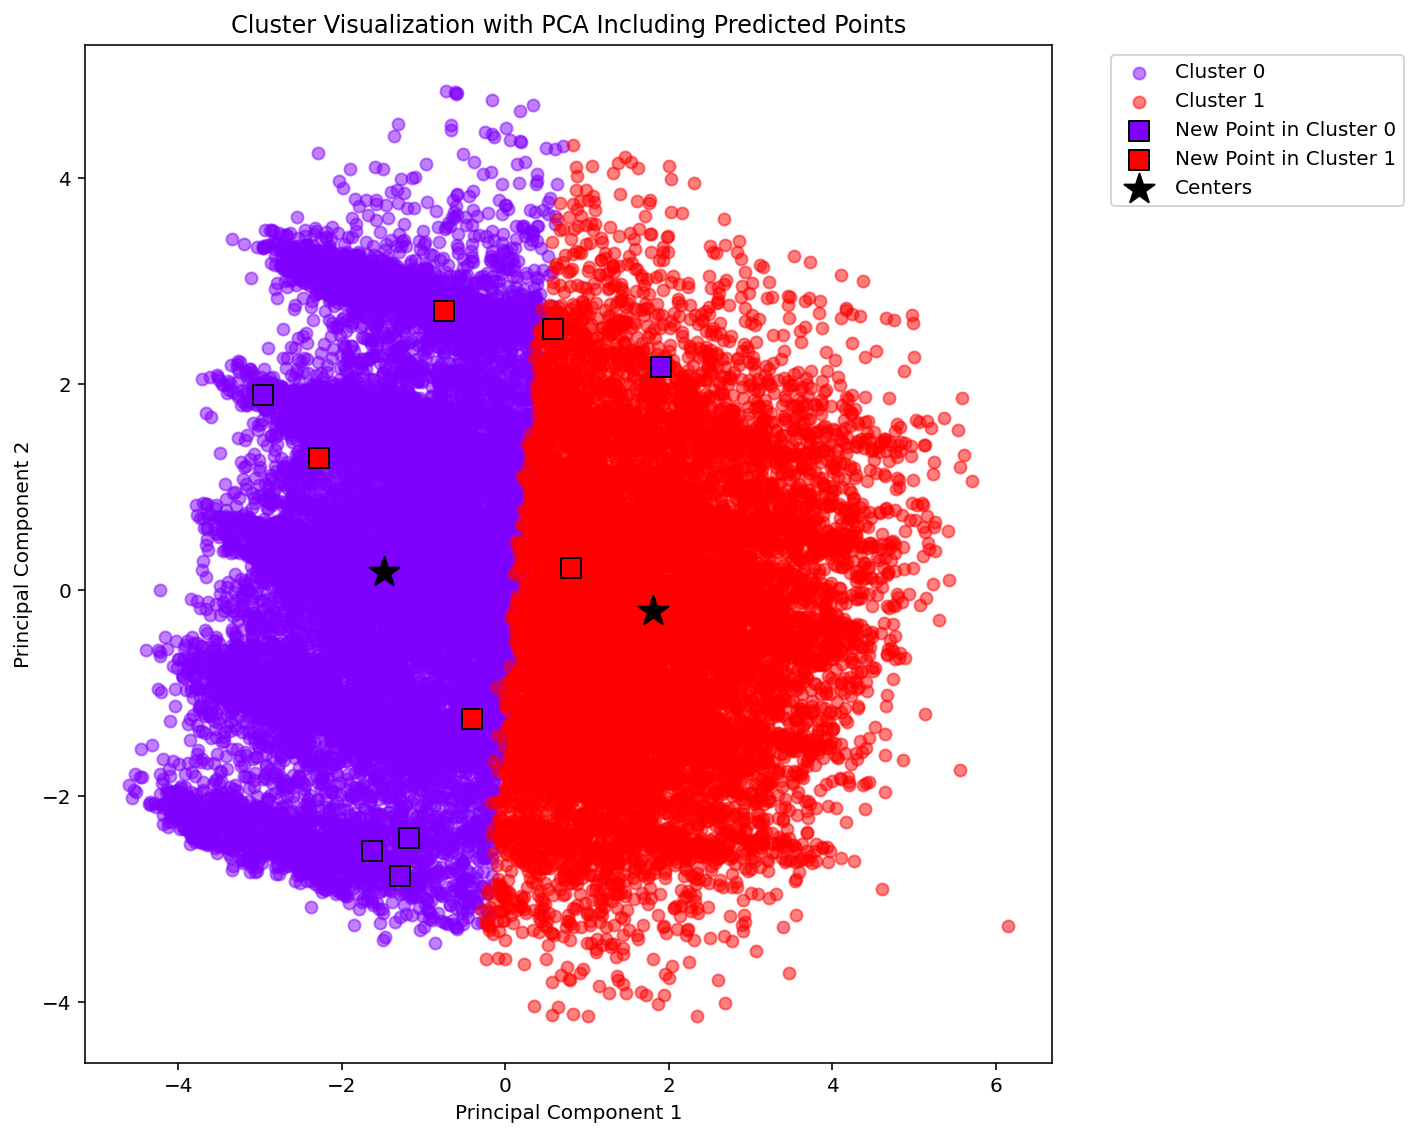

In [111]:
plot_cluster_scatter(data_preprocessed, k_optimal)

In [98]:
def plot_with_confidence_interval_and_error_bars(data_clean, X_delay_clean, y_delay_clean, lin_reg_delay, results):
    """
    Plots departure vs. arrival delays with regression fit, confidence intervals, and error bars.

    Parameters:
    - data_clean: DataFrame containing cleaned data with 'Departure Delay in Minutes' and 'Arrival Delay in Minutes'.
    - X_delay_clean: Array-like object containing the predictor (X) variable.
    - y_delay_clean: Array-like object containing the response (y) variable.
    - lin_reg_delay: Linear regression model fitted to the data.
    - results: Results from the Ordinary Least Squares (OLS) regression model.

    Returns:
    None
    """ 
    plt.figure(figsize=(12, 8), dpi=144)
    
    # Scatter plot of actual data points
    sns.scatterplot(data=data_clean, x='Departure Delay in Minutes', y='Arrival Delay in Minutes',
                    alpha=0.6, marker='o', color='royalblue', label='Actual Data')
    
    # Line of best fit and predictions for delays from 0 to 1000 minutes
    X_range_1 = np.linspace(0, 1000, 100).reshape(-1, 1)
    y_range_pred_1 = lin_reg_delay.predict(X_range_1)
    
    # Plotting the line of best fit for delays from 0 to 1000 minutes
    plt.plot(X_range_1, y_range_pred_1, color='red', label='Line of Best Fit (0-1000 min)')
    
    # Confidence interval for the regression line for delays from 0 to 1000 minutes
    X_range_sm_1 = sm.add_constant(X_range_1)
    _, pred_upper_1, pred_lower_1 = wls_prediction_std(results, exog=X_range_sm_1, alpha=0.05)
    plt.fill_between(X_range_1.flatten(), pred_lower_1, pred_upper_1, color='grey', alpha=0.2, label='95% CI (0-1000 min)')
    
    # Prediction intervals (error bars) for a subset of points for delays from 0 to 1000 minutes
    se_prediction_1 = np.sqrt(results.mse_resid * (1 + np.sum((X_range_1 - np.mean(X_delay_clean))**2, axis=1) / np.sum((X_delay_clean - np.mean(X_delay_clean))**2)))
    t_value_1 = stats.t.ppf(0.975, len(X_delay_clean) - 2)  # 95% CI, df = n - 2
    error_margins_1 = t_value_1 * se_prediction_1
    
    # Plotting error bars for the subset of predictions for delays from 0 to 1000 minutes
    plt.errorbar(X_range_1.flatten()[::10], y_range_pred_1[::10], yerr=error_margins_1[::10], 
                 fmt='o', ecolor='green', capsize=5, alpha=0.7, label='Prediction Error Bars (0-1000 min)')
    
    # Line of best fit and predictions for delays from 1000 to 2000 minutes
    X_range_2 = np.linspace(1000, 2000, 100).reshape(-1, 1)
    y_range_pred_2 = lin_reg_delay.predict(X_range_2)
    
    # Plotting the line of best fit for delays from 1000 to 2000 minutes
    plt.plot(X_range_2, y_range_pred_2, color='blue', label='Line of Best Fit (1000-2000 min)')
    
    # Confidence interval for the regression line for delays from 1000 to 2000 minutes
    X_range_sm_2 = sm.add_constant(X_range_2)
    _, pred_upper_2, pred_lower_2 = wls_prediction_std(results, exog=X_range_sm_2, alpha=0.05)
    plt.fill_between(X_range_2.flatten(), pred_lower_2, pred_upper_2, color='orange', alpha=0.2, label='95% CI (1000-2000 min)')
    
    # Prediction intervals (error bars) for a subset of points for delays from 1000 to 2000 minutes
    se_prediction_2 = np.sqrt(results.mse_resid * (1 + np.sum((X_range_2 - np.mean(X_delay_clean))**2, axis=1) / np.sum((X_delay_clean - np.mean(X_delay_clean))**2)))
    t_value_2 = stats.t.ppf(0.975, len(X_delay_clean) - 2)  # 95% CI, df = n - 2
    error_margins_2 = t_value_2 * se_prediction_2
    
    # Plotting error bars for the subset of predictions for delays from 1000 to 2000 minutes
    plt.errorbar(X_range_2.flatten()[::10], y_range_pred_2[::10], yerr=error_margins_2[::10], 
                 fmt='o', ecolor='purple', capsize=5, alpha=0.7, label='Prediction Error Bars (1000-2000 min)')
    
    # Plot adjustments
    plt.title('Departure vs. Arrival Delays with Regression Fit, CI, and Error Bars')
    plt.xlabel('Departure Delay (in minutes)')
    plt.ylabel('Arrival Delay (in minutes)')
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.legend()
    plt.tight_layout()

# Clean the data to remove NaN values for 'Arrival Delay in Minutes'
data_clean = data.dropna(subset=['Arrival Delay in Minutes'])

# Prepare the predictor (X) and response (y) variables
X_delay_clean = data_clean[['Departure Delay in Minutes']].values
y_delay_clean = data_clean['Arrival Delay in Minutes'].values

# Fit the linear regression model
lin_reg_delay = LinearRegression()
lin_reg_delay.fit(X_delay_clean, y_delay_clean)

# Fit an OLS model to get confidence intervals
X_delay_clean_sm = sm.add_constant(X_delay_clean)
model = sm.OLS(y_delay_clean, X_delay_clean_sm)
results = model.fit()

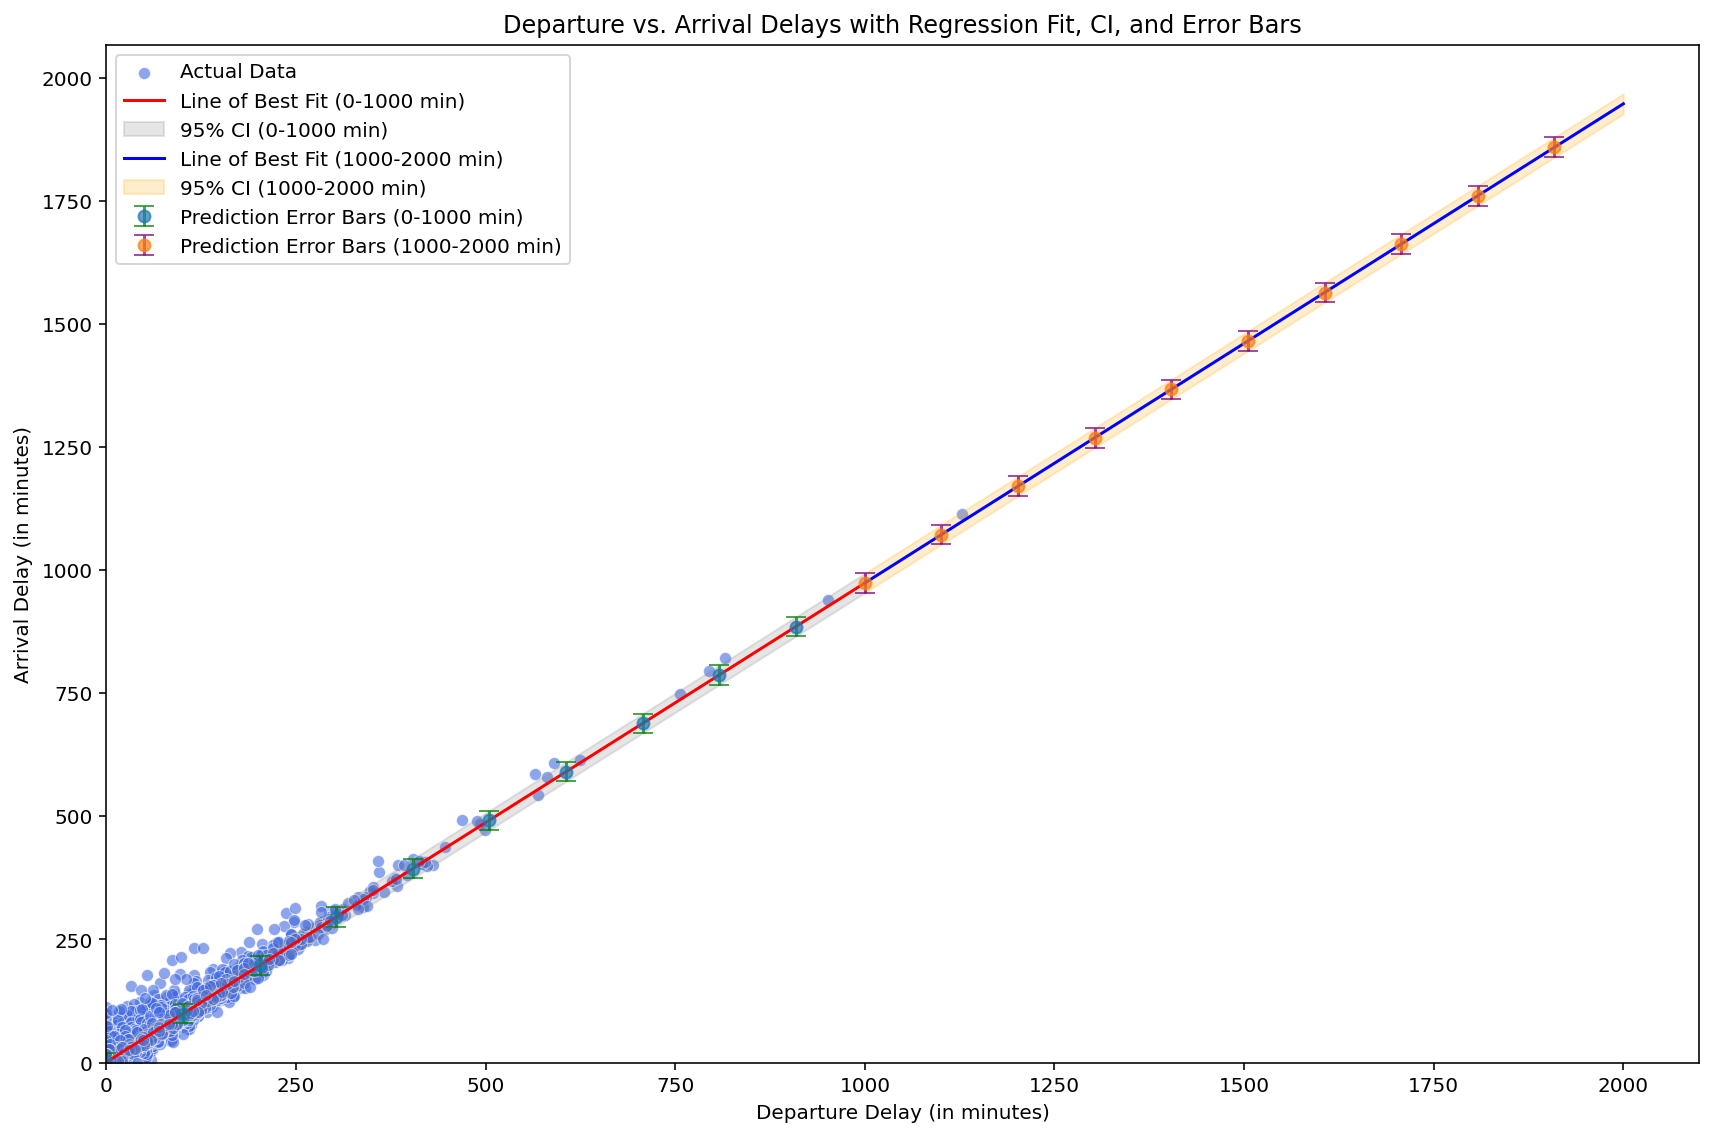

In [99]:
plot_with_confidence_interval_and_error_bars(data_clean, X_delay_clean, y_delay_clean, lin_reg_delay, results)